## Generate an AWS costs chart

AWS costs are downloaded via the AWS costs explorer API. The adapter creates a simpler
'costs' view which we use to build our chart.

The main logic is grouping by service but bucketing small-value services into an "other" category.

In [8]:
$AWS=SELECT  case
    WHEN service like '%Redshift%' then 'Redshift'
    WHEN service like '%Compute Cloud%' then 'EC2'
    WHEN service like '%SageMaker%' then service
    WHEN service like '%Relational Database Service%' then 'RDS'
    WHEN service like '%Simple Storage Service%' then 'S3'
    WHEN service = 'AmazonCloudWatch' then 'CloudWatch'
    WHEN service like '%CloudFront%' then 'CloudFront'
    WHEN service like '%EC2 - Other%' then 'EC2'
    ELSE 'other'
  end as svc_name,
  case 
    WHEN sum(blended) > 10000 then 10000
    ELSE sum(blended)
  end as total,  
  cast("day" as varchar) as end_date
FROM
  awscosts.costs
WHERE
  "day"  >= (now() - interval 30 day) 
     and 
   purchase not like '%Reserved%'
     and
   service not like '%AWS Support%'
GROUP BY
  svc_name, "day"
ORDER BY
  "day", total desc


220 rows

svc_name,total,end_date
RDS,1082.27,2022-08-15
Redshift,564.06,2022-08-15
S3,504.31,2022-08-15
other,395.30,2022-08-15
CloudWatch,393.01,2022-08-15
EC2,293.42,2022-08-15
CloudFront,202.37,2022-08-15
RDS,1098.04,2022-08-16
Redshift,580.15,2022-08-16
S3,509.73,2022-08-16


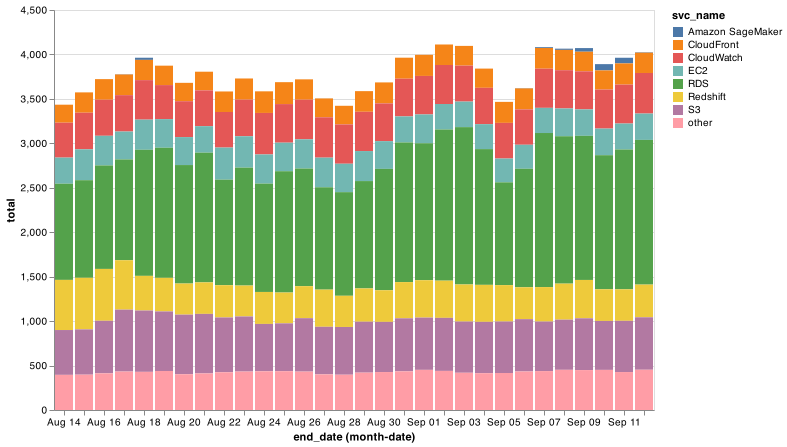

In [9]:
create chart from $AWS as bar_chart where x = 'monthdate(end_date):O' and y = total and color = svc_name

In [6]:
email chart to 'scottp@berkeleyzone.net' subject 'AWS Costs report'

Emailing last chart to ['scottp@berkeleyzone.net']

In [7]:
run every day starting at 09:15

Scheduled to run notebook aws_costs.ipynb